In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp.index.freq = 'MS'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [3]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [4]:
df = df.join(sp)

In [5]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [6]:
df.dropna(inplace=True)

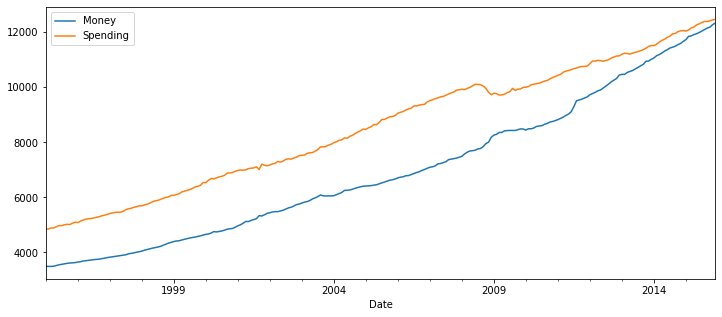

In [7]:
df.plot(figsize=(12,5))

In [8]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')

    labels = ['ADF Test Statistics', 'p-value', 'no. og lags used', 'no. of observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical values ({key})'] = val

    print(out.to_string())

    if result[1] <= 0.05:
        print('Strong evidence against the null hypopthesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [9]:
adf_test(df['Money'])

Augmented Dickey-Fuller test: 
ADF Test Statistics        4.239022
p-value                    1.000000
no. og lags used           4.000000
no. of observations      247.000000
critical values (1%)      -3.457105
critical values (5%)      -2.873314
critical values (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
adf_test(df['Spending'])

Augmented Dickey-Fuller test: 
ADF Test Statistics        0.149796
p-value                    0.969301
no. og lags used           3.000000
no. of observations      248.000000
critical values (1%)      -3.456996
critical values (5%)      -2.873266
critical values (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
df_transformed = df.diff()

In [12]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller test: 
ADF Test Statistics       -2.057404
p-value                    0.261984
no. og lags used          15.000000
no. of observations      235.000000
critical values (1%)      -3.458487
critical values (5%)      -2.873919
critical values (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller test: 
ADF Test Statistics     -7.226974e+00
p-value                  2.041027e-10
no. og lags used         2.000000e+00
no. of observations      2.480000e+02
critical values (1%)    -3.456996e+00
critical values (5%)    -2.873266e+00
critical values (10%)   -2.573019e+00
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
df_transformed = df_transformed.diff().dropna()

In [15]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller test: 
ADF Test Statistics     -7.077471e+00
p-value                  4.760675e-10
no. og lags used         1.400000e+01
no. of observations      2.350000e+02
critical values (1%)    -3.458487e+00
critical values (5%)    -2.873919e+00
critical values (10%)   -2.573367e+00
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller test: 
ADF Test Statistics     -8.760145e+00
p-value                  2.687900e-14
no. og lags used         8.000000e+00
no. of observations      2.410000e+02
critical values (1%)    -3.457779e+00
critical values (5%)    -2.873609e+00
critical values (10%)   -2.573202e+00
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
nobs = 12

In [18]:
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

In [19]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




In [20]:
results = model.fit(5)

In [21]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Aug, 2020
Time:                     13:53:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [22]:
lagged_values = train.values[-5:]
z = results.forecast(y=lagged_values, steps=12)

In [23]:
idx = pd.date_range('2015-01-01', periods=12, freq='MS')

In [24]:
df_forecast = pd.DataFrame(data=z, index=idx, columns=['Money_2D', 'Spending_2D'])

In [25]:
df_forecast

,Money_2D,Spending_2D
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [26]:
df_forecast['Money1D'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2D'].cumsum()

df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1D'].cumsum()

In [27]:
df_forecast['Spending1D'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2D'].cumsum()

df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1D'].cumsum()

In [28]:
df_forecast.head()

,Money_2D,Spending_2D,Money1D,MoneyForecast,Spending1D,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [29]:
test_range = df[-nobs:]

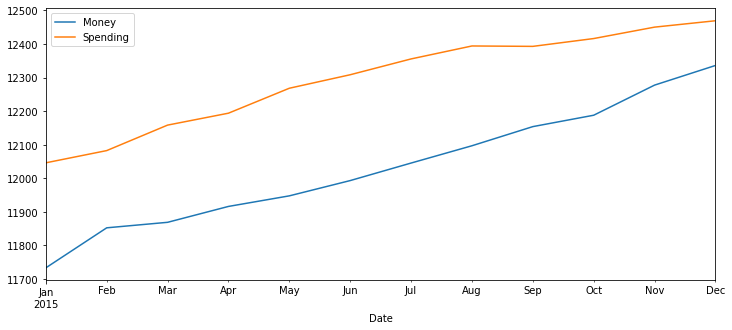

In [30]:
test_range.plot(figsize=(12,5))

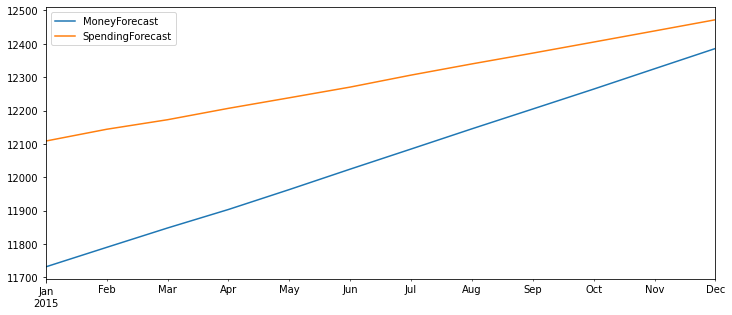

In [31]:
df_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(12,5))

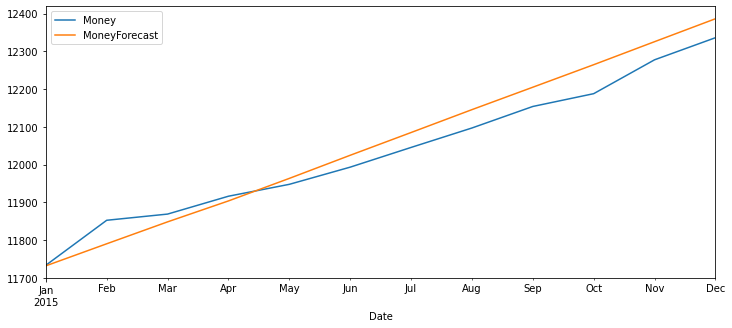

In [32]:
test_range['Money'].plot(legend=True, figsize=(12,5))
df_forecast['MoneyForecast'].plot(legend=True)

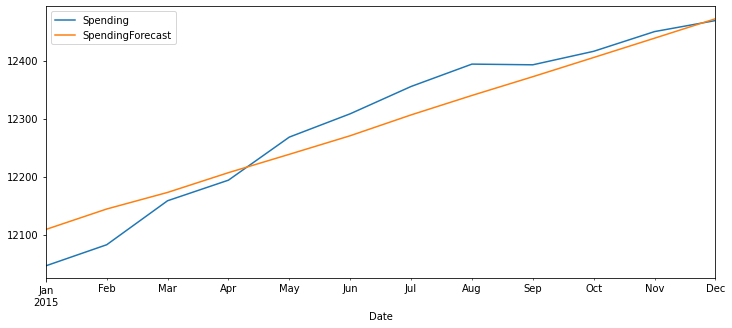

In [33]:
test_range['Spending'].plot(legend=True, figsize=(12,5))
df_forecast['SpendingForecast'].plot(legend=True)

In [34]:
rmse(test_range['Money'], df_forecast['MoneyForecast'])

43.71049653558893

In [35]:
test_range['Money'].mean()

12034.008333333333

In [36]:
rmse(test_range['Spending'], df_forecast['SpendingForecast'])

37.001175169408285

In [37]:
test_range['Spending'].mean()

12294.533333333333